In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
def read_csv(file):
    #čitanje csva
    df = pd.read_csv(file,usecols=['time','total_active_power'], parse_dates=['time'], encoding='latin1')
    #print(df)
    return df

In [70]:
def power_graph(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['time'], df['total_active_power'], marker='o', linestyle='-')
    plt.title('Total Active Power Over Time')
    plt.xlabel('Time')
    plt.ylabel('Total Active Power')
    plt.grid(True)
    plt.show()

In [71]:
df = read_csv("bojler\{}\{}_{}.csv".format(2023,11, 2023))

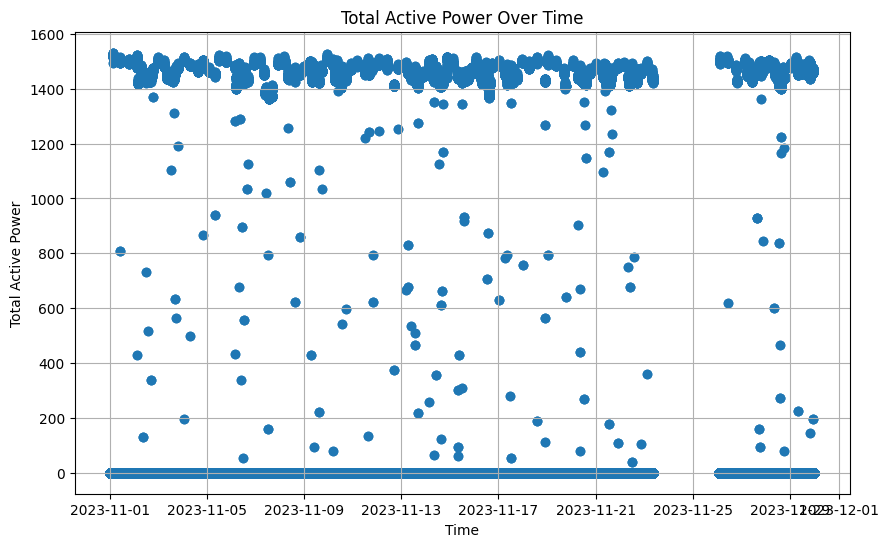

In [72]:
power_graph(df)

In [73]:
#srednja vrijednost svih koji nisu nula
df2= (df[df['total_active_power']!=0])
mean= df2['total_active_power'].mean()
print(mean)

1448.9279894453457


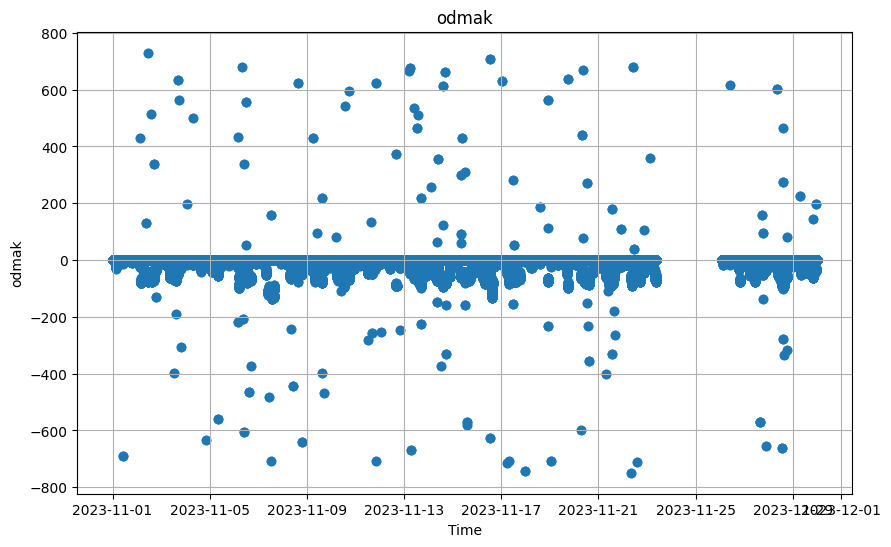

In [92]:
#df['odmak'] = np.minimum(abs(mean - df['total_active_power']), abs(0 - df['total_active_power']))
#df['odmak'] = df.apply(lambda row: -abs(1500 - row['total_active_power'])
 #                               if abs(1500 - row['total_active_power']) < abs(0 - row['total_active_power'])
  #                              else abs(0 - row['total_active_power'], axis=1))



df['odmak'] = np.where(
    np.abs(1500 - df['total_active_power']) < np.abs(df['total_active_power']),
    -np.abs(1500 - df['total_active_power']),
    np.abs(0 - df['total_active_power'])
)

    
plt.figure(figsize=(10, 6))
plt.scatter(df['time'], df['odmak'], marker='o', linestyle='-')
plt.title('odmak')
plt.xlabel('Time')
plt.ylabel('odmak')
plt.grid(True)
plt.show()

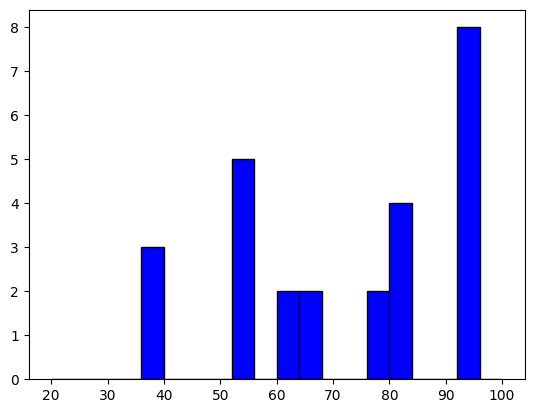

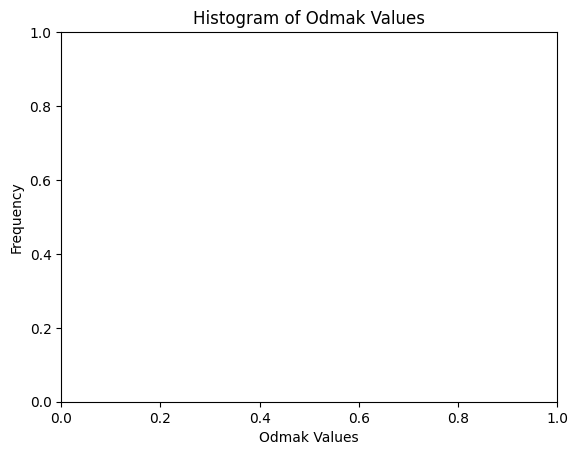

In [102]:
zoom_range = (20, 100)  # Adjust these values based on your data


plt.hist(df['odmak'], bins=20, color='blue', edgecolor='black', range=zoom_range)

# 

# Show the plot
plt.show()
# Add labels and title
plt.xlabel('Odmak Values')
plt.ylabel('Frequency')
plt.title('Histogram of Odmak Values')

# Show the plot
plt.show()

0.7447993800980289


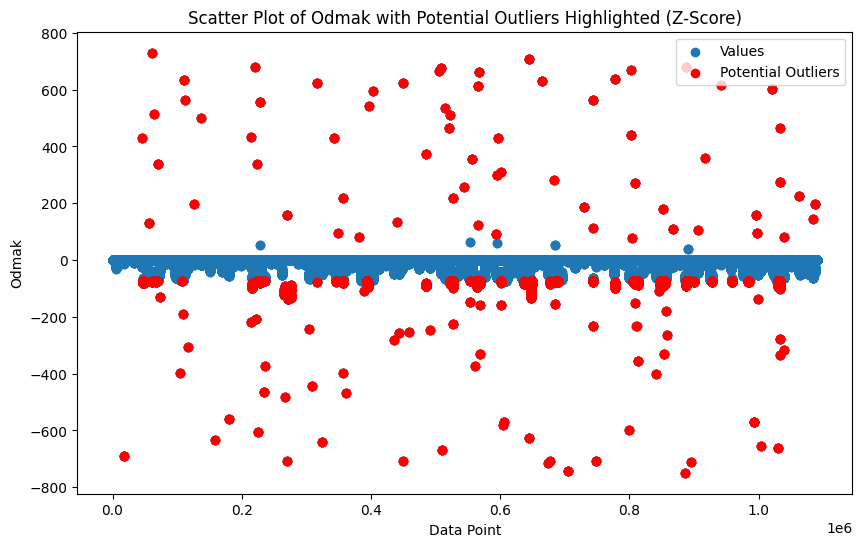

In [117]:
mean_odmak = df['odmak'].mean()
std_odmak = df['odmak'].std()
z_scores = (df['odmak'] - mean_odmak) / std_odmak

#print(mean_odmak)
# Define a threshold for potential outliers
threshold = 5

# Identify potential outliers
outliers = df[abs(z_scores) > threshold]
print(len(outliers)/len(df)*100)
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(df)), y=df['odmak'], label='Values')
plt.scatter(x=outliers.index, y=outliers['odmak'], color='red', label='Potential Outliers')
plt.xlabel('Data Point')
plt.ylabel('Odmak')
plt.title('Scatter Plot of Odmak with Potential Outliers Highlighted (Z-Score)')
plt.legend(loc="upper right")
plt.show()

In [118]:
outliers

,time,total_active_power,odmak
17177,2023-11-01 09:56:42,810.0,-690.0
17178,2023-11-01 09:56:44,810.0,-690.0
17179,2023-11-01 09:56:46,810.0,-690.0
46209,2023-11-02 02:45:09,429.0,429.0
46210,2023-11-02 02:45:11,429.0,429.0
...,...,...,...
1083804,2023-11-29 20:08:02,144.0,144.0
1083805,2023-11-29 20:08:04,144.0,144.0
1088002,2023-11-29 22:33:35,197.0,197.0
1088003,2023-11-29 22:33:37,197.0,197.0
